<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tipos de errores.

Errores en la computación, ver libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)
:


>- ### Blunder or bad theory
Errores tipográficos de entrada, errores en los datos, razonamientos teoricos malos, entre otros.
>- ### Errores aleatorios.
Impresiones causadas por eventos tales como fluctuaciones electronicas, rayos cósmicos. Se presentan rara vez, y y tiene una mayor probabilidad de ocurrir cuando los calculos se demoran del orden de semanas.
>- ### Errores de aproximación:
Se presentan por truncamiento de los modelos numéricos, por ejemplol si consideramos la serie asociada a la función
$\sin x$:

\begin{equation}
\sin x = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!}
\end{equation}


\begin{equation}
\sin x = \sum_{n=1}^{N} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!} + \varepsilon(x, N)
\end{equation}


> El error numérico  en el calculo computacional es del orden de  $\varepsilon(x, N)$, dado que el computador debe truncar la serie en un N determinado.


>- ### Errores de redondeo:
Análogos a los errores  de  cantidad experimentales.


# Errores de redondeo:
## Cancelacion substractiva

Sea $b_c = b (1+ \epsilon)$ y Sea $c_c = c (1+ \epsilon)$ La representacion de dos números en el computador.  Calculemos la diferencia entre estos dos números:


$a_c = (b-c) + b\epsilon_b -c\epsilon_c = a+ b\epsilon_b -c\epsilon_c$

$\frac{a_c}{a} = 1 + \frac{b}{a}\epsilon_b -\frac{c}{a}\epsilon_c $

$\frac{a_c}{a} = 1 + \frac{b}{a} \max(\epsilon_b,\epsilon_c) $

Si $b\approx c$, el valor de a es un valor muy grande.





In [ ]:
import numpy as np

In [ ]:
print(np.float32(12.123452) - np.float32(12.123450))
valor_real = 0.000002

(12.123452/valor_real)*1/(2**31)

In [ ]:
print(np.float32(1234567895) - np.float32(1234567890))
print(np.float64(1234567895) - np.float64(1234567890))
print("¿Cual es la diferencia entre estas dos restas?")

In [ ]:
print(np.float32(12345675) - np.float32(12345671))
print(np.float64(1234567895) - np.float64(1234567890))
print("¿Cual es la diferencia entre estas dos restas?")

In [ ]:
xt = 12345678912.345678
yt = 12345678912.345677
xt-yt

In [ ]:
xt = 0.0000000000000005
yt = 0.0000000000000006
xt-yt

In [ ]:
a = np.float16(1.2345678912345678912)-np.float16(1.2345678900000000000)
r = 0.0000000012345678912
print(r)

## Errores de acumulación
$\epsilon_{ro}=\sqrt{N}\epsilon_m$


In [ ]:
#Con numeros de 32 bit.
eps = np. float64(0)
N = 1000000
for i in range(0, N):
 eps = np.float32(0.1) + eps

exac = N*0.1
error = np.abs(exac-eps) / exac
print("Valor a través de la suma: ", eps)
print("Valor exacto: ",  exac)
print("Error ", error*100 )



## Errores de aproximación.
 $\epsilon_{aprox}=\frac{\alpha}{N^{\beta}}$


## Error total:
 $\epsilon_{aprox} = \epsilon_{ro}+\epsilon_{aprox}$



# Errores de una serie

- ¿Converge la serie?
- ¿Qué tan preciso es la convergencia?
- Costo computacional


## Error de una serie
Sea $x$ el valor verdadero y $x^*$ el valor aproximado

- Error absoluto : se define como
\begin{equation*}
\epsilon_{abs}= |x-x^*|
\end{equation*}
- Error relativo : es dado por
\begin{equation*}
\epsilon_{rel}= \frac{|x-x^*|}{|x|}
\end{equation*}
- Error en series : El error para truncar una serie se toma como
\begin{equation*}
\epsilon_{aprox}= \left|\frac{nth\hbox{-term}}{\hbox{suma}}\right|< \hbox{eps}
\end{equation*}
La tolerancia normalmente se toma como un número pequeño, por ejemplo `eps` $=10^{-10}$. Note que no se trunca la serie usando $|{nth}\hbox{-term}|<$ eps,   usar esta forma puede conducir a errores debido a que no se compara con el valor de la suma (un millon compardo a uno es grande, pero comparado a diez mil millones es pequeño).

Tomemos como ejemplo otra vez el cálculo de la serie del seno,


# Laboratorio

## 1. Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.

In [2]:
##Punto abuilt-in function exp(x)
import numpy as np
from math import factorial as ft

def exponente_neg(x,N):
  xN=0
  for n in range(N):

    xN= xN+((-1)**n)*((x)**n)/ft(n)

  return xN
print(exponente_neg(0.5,100))

np.exp(-0.5)


0.6065306597126333


0.6065306597126334

In [3]:
##punto B

def junto(x,N):
  xi=0
  for n in range(N):

    xi= xi+((-1)**n)*((x)**n)/ft(n)
    if abs(((-x)**(n+1))/ft(n+1))<=abs((xi*10**(-7))):
        print("converge en el N",n)
        break

  return xi

np.exp(-0.5)-junto(0.5,100)


converge en el N 8


-5.124916158116832e-09

In [4]:

#punto c
#c)
x=np.arange(9.0,10.1,0.1)

for i in x:
  a= exponente_neg(i,100)
  print(f'para {i} la funcion tiene un valor {a}')

for i in x:
  n=i-1
  b= exponente_neg(n,100)
  print(f'para {n} la funcion tiene un valor {b}')
np.exp(-8)

para 9.0 la funcion tiene un valor 0.0001234098040117991
para 9.1 la funcion tiene un valor 0.00011166580801572555
para 9.2 la funcion tiene un valor 0.00010103940170494591
para 9.299999999999999 la funcion tiene un valor 9.142423139171752e-05
para 9.399999999999999 la funcion tiene un valor 8.272406570578046e-05
para 9.499999999999998 la funcion tiene un valor 7.485182984988127e-05
para 9.599999999999998 la funcion tiene un valor 6.772873680086763e-05
para 9.699999999999998 la funcion tiene un valor 6.128349524510923e-05
para 9.799999999999997 la funcion tiene un valor 5.5451599545606414e-05
para 9.899999999999997 la funcion tiene un valor 5.017468265034053e-05
para 9.999999999999996 la funcion tiene un valor 4.539993033500692e-05
para 8.0 la funcion tiene un valor 0.0003354626278529547
para 8.1 la funcion tiene un valor 0.00030353913809112314
para 8.2 la funcion tiene un valor 0.00027465356986861554
para 8.299999999999999 la funcion tiene un valor 0.0002485168272286546
para 8.3999999

0.00033546262790251185

In [5]:
#punto d
def exp_sinalter(x,N):
  xN=0
  for n in range(N):

    xN= xN+(((x)**n)/ft(n))

  return xN
print(exp_sinalter(10,500))
np.exp(10)


22026.46579480671


22026.465794806718

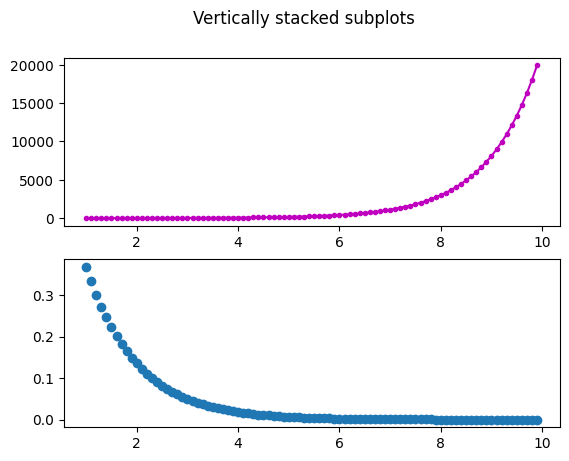

In [6]:
#punto e
import matplotlib.pyplot as plt
#grafico para x entre 1 y 10
x_ini= np.arange(1,10,0.1)
valor_ini= np.array([exponente_neg(-x,60) for x in x_ini])
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(x_ini,valor_ini,'.m-',label= 'funcion creada para exp(-x)')
axs[1].plot(x_ini,np.exp(-(x_ini)),'o',label= 'funcion creada para exp(-x)')
x=np.arange(1,11)
for i in range(1,11):
  y_0_10 = exponente_neg(i,60)
  #print(y_0_10)





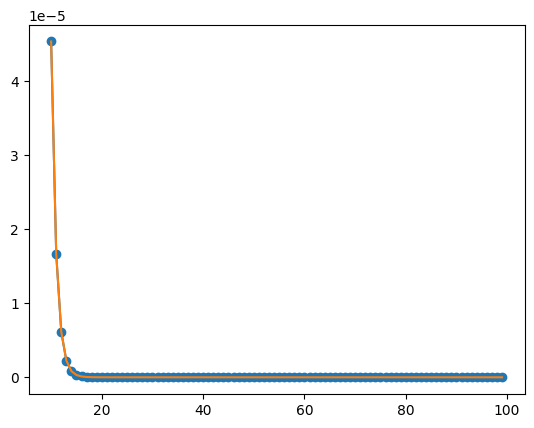

In [7]:
y=np.zeros(90)


x2=np.arange(10,100)
for i in range(10,100):
  y2=exponente_neg(i,100)
  y[(i-10)]=y2
  #print(y2)
  if(y2)<0:  #aquí muestro cuando la exponencial es negativa- absurdo
   #print(i)
   break
plt.plot(x2,y,'o-')


plt.plot(x2,np.exp(-(x2)),'-')
#np.exp(-(x2))


La grafica muestra una divergencia desde que x toma el valor de 85 aproximadamente, sin embargo matematicamente empieza desde la iteracion 12


- Make a series of graphs of the error versus N for different values of x.

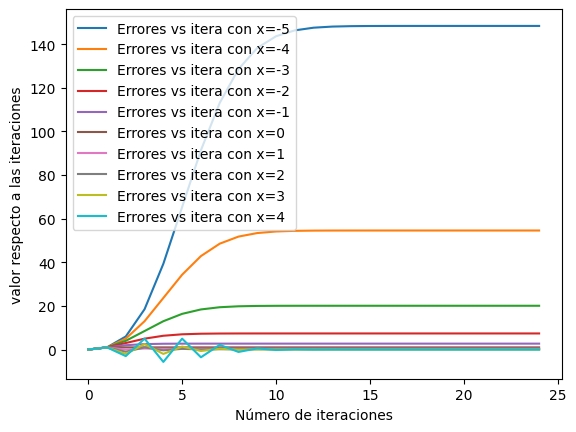

In [10]:
#punto f
def Graphs(x):
  rotante= np.arange(0,25)
  b=[]
  for i in rotante:
    b.append(exponente_neg(x,i))
  return plt.plot(rotante,b, label=f"Errores vs itera con x={x}")
n_graph= np.arange(-5,5)
for i in n_graph:
  Graphs(i)
  plt.legend()
  plt.xlabel("Número de iteraciones")
  plt.ylabel("valor respecto a las iteraciones")

## 2. Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




In [9]:
def sum1(N):
  xn=0
  for n in range(1,((2*N)+1)):
    xn+=((-1)**n)*(n/(n+1))
    #print(xn)
  return xn



def sum2(N):
  xn_1=0
  xn_2=0

  for n in range(1,N+1):
    xn_1+= ((2*n)-1)/(2*n)
    xn_2+=(2*n)/((2*n)+1)

  return xn_2-xn_1


def sum3(N):
  xn_3=0

  for n in range(1,N+1):
    xn_3+=1/((2*n)*((2*n)+1))
  return xn_3
print(sum1(10))
print(sum2(10))
sum3(1000)

0.2836095492055243
0.2836095492055257


0.30660300681512476

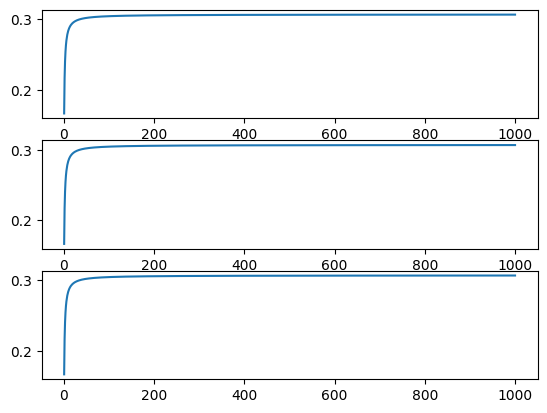

In [ ]:
fig,axs = plt.subplots(3)
N=1000
x=np.arange(1,N+1)
valors_sum1= np.array([sum1(i) for i in x])
valors_sum2= np.array([sum2(i) for i in x])
valors_sum3= np.array([sum3(i) for i in x])
axs[0].plot(x,valors_sum1)
axs[1].plot(x,valors_sum2)
axs[2].plot(x,valors_sum3)

<ipython-input-129-09799088300d>:5: RuntimeWarning: divide by zero encountered in log10
  return np.log10(E1)
<ipython-input-129-09799088300d>:10: RuntimeWarning: divide by zero encountered in log
  return np.log(E2)


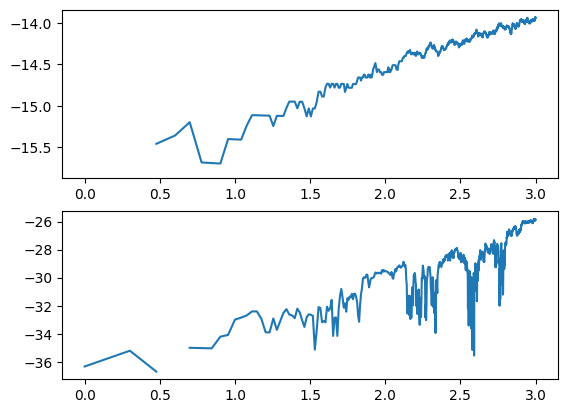

In [ ]:
X=1*10**3
x1=np.arange(1,X+1)
def error1(X):
  E1=abs((sum1(X)-sum3(X))/sum3(X))
  return np.log10(E1)

def error2(X):
  E2=abs((sum2(X)-sum3(X))/sum3(X))

  return np.log(E2)

fig,axs = plt.subplots(2)
valors_error1= np.array([error1(i) for i in x1])

valors_error2= np.array([error2(i) for i in x1])
axs[0].plot(np.log10(x1),valors_error1)
axs[1].plot(np.log10(x1),valors_error2);


In [1]:
X=1*10**2
x1=np.arange(1,X+1)
def error1(X):
  E=(sum1(X)-sum3(X))/sum3(X)
  print(E)
  return np.log10(E)
def error2(X):
  E=(sum2(X)-sum3(X))/sum3(X)
  if sum3(X)==1:
    print(X)
  return np.log(E)

NameError: name 'np' is not defined